In [ ]:
! pip install -q kaggle

FROM LOCAL

In [ ]:
#UPLOAD JSON
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle

In [ ]:
#Make directory named kaggle and copy kaggle.json file there.
! cp kaggle.json ~/.kaggle/

In [ ]:
#Change the permissions of the file.
! chmod 600 ~/.kaggle/kaggle.json

FROM DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


KAGGLE API JSON IS INSIDE THE KAGGLE DIRECTORY

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/Kaggle'
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d iamhungundji/covid19-symptoms-checker

  0% 0.00/912k [00:00<?, ?B/s]
100% 912k/912k [00:00<00:00, 61.1MB/s]


In [ ]:
!kaggle kernels pull harshaggarwal7/covid-19-symptom-analysis

Source code downloaded to /content/gdrive/MyDrive/Kaggle/covid-19-symptom-analysis.ipynb


In [ ]:
!unzip \*.zip 

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import norm
from scipy import stats
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv("Cleaned-Data.csv")

pd.pandas.set_option('display.max_columns',None)

In [ ]:
df.shape

(316800, 27)

In [ ]:
df.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')

In [ ]:
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,Other


In [ ]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,China


In [ ]:
display("Peeking into Data", df)

'Peeking into Data'

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,Other


In [ ]:
display("Shape of dataset")
print("Rows:",df.shape[0],"\nColumns:",df.shape[1])

'Shape of dataset'

Rows: 316800 
Columns: 27


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [ ]:
df.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,0.090909,0.200000,0.200000,0.200000,0.200000,0.200000,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,0.287480,0.400001,0.400001,0.400001,0.400001,0.400001,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
display("NULL Values", df.isnull().sum())

'NULL Values'

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64

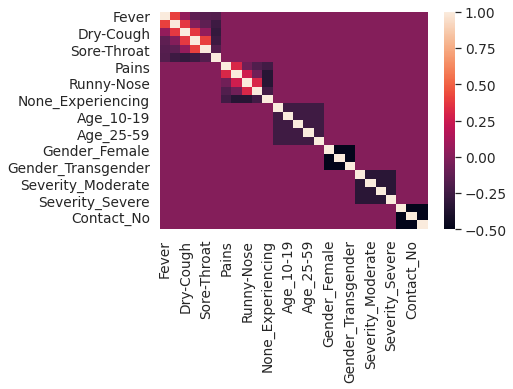

In [ ]:
import seaborn as sns
sns.heatmap(df.corr())

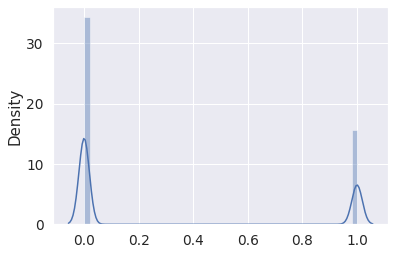

In [ ]:
#df = df.drop('Country',axis=1)
sns.distplot(df.drop('Country',axis=1))

In [ ]:
for i in df.columns:
    print("\nColumn Name:",i,"-->",df[i].unique(),"-->Unique Count",len(df[i].unique()))


Column Name: Fever --> [1 0] -->Unique Count 2

Column Name: Tiredness --> [1 0] -->Unique Count 2

Column Name: Dry-Cough --> [1 0] -->Unique Count 2

Column Name: Difficulty-in-Breathing --> [1 0] -->Unique Count 2

Column Name: Sore-Throat --> [1 0] -->Unique Count 2

Column Name: None_Sympton --> [0 1] -->Unique Count 2

Column Name: Pains --> [1 0] -->Unique Count 2

Column Name: Nasal-Congestion --> [1 0] -->Unique Count 2

Column Name: Runny-Nose --> [1 0] -->Unique Count 2

Column Name: Diarrhea --> [1 0] -->Unique Count 2

Column Name: None_Experiencing --> [0 1] -->Unique Count 2

Column Name: Age_0-9 --> [1 0] -->Unique Count 2

Column Name: Age_10-19 --> [0 1] -->Unique Count 2

Column Name: Age_20-24 --> [0 1] -->Unique Count 2

Column Name: Age_25-59 --> [0 1] -->Unique Count 2

Column Name: Age_60+ --> [0 1] -->Unique Count 2

Column Name: Gender_Female --> [0 1] -->Unique Count 2

Column Name: Gender_Male --> [1 0] -->Unique Count 2

Column Name: Gender_Transgender -->

In [ ]:
df.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')

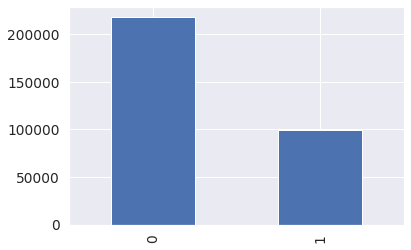

In [ ]:
df['Sore-Throat'].value_counts().plot(kind='bar')

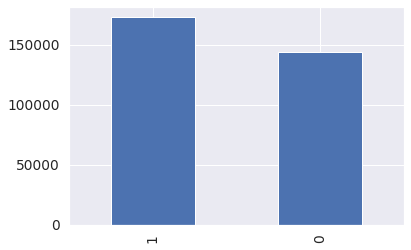

In [ ]:
df['Runny-Nose'].value_counts().plot(kind='bar')

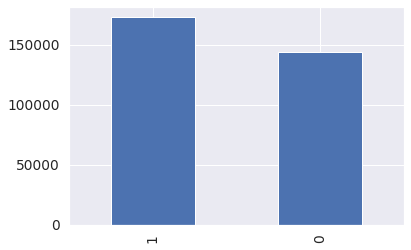

In [ ]:
df['Nasal-Congestion'].value_counts().plot(kind='bar')

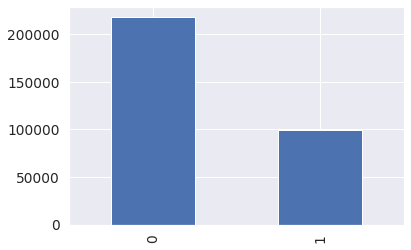

In [ ]:
df['Fever'].value_counts().plot(kind='bar')

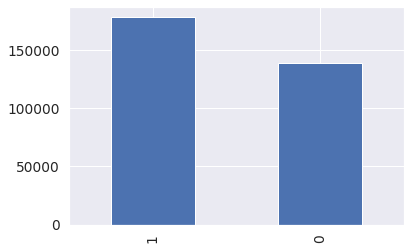

In [ ]:
df['Dry-Cough'].value_counts().plot(kind='bar')

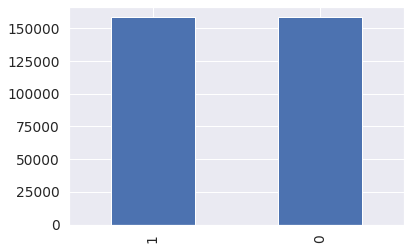

In [ ]:
df['Difficulty-in-Breathing'].value_counts().plot(kind='bar')

In [ ]:
df['Difficulty-in-Breathing'].value_counts()

1    158400
0    158400
Name: Difficulty-in-Breathing, dtype: int64

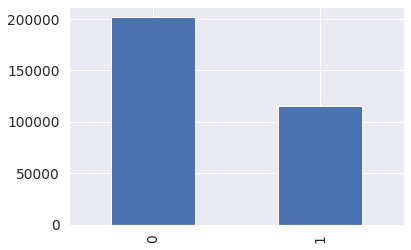

In [ ]:
df['Diarrhea'].value_counts().plot(kind='bar')

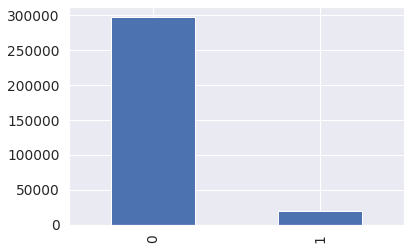

In [ ]:
df['None_Sympton'].value_counts().plot(kind='bar')

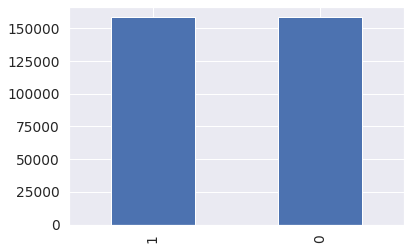

In [ ]:
df['Tiredness'].value_counts().plot(kind='bar')

In [ ]:
df['Tiredness'].value_counts()

1    158400
0    158400
Name: Tiredness, dtype: int64

IndexError: ignored

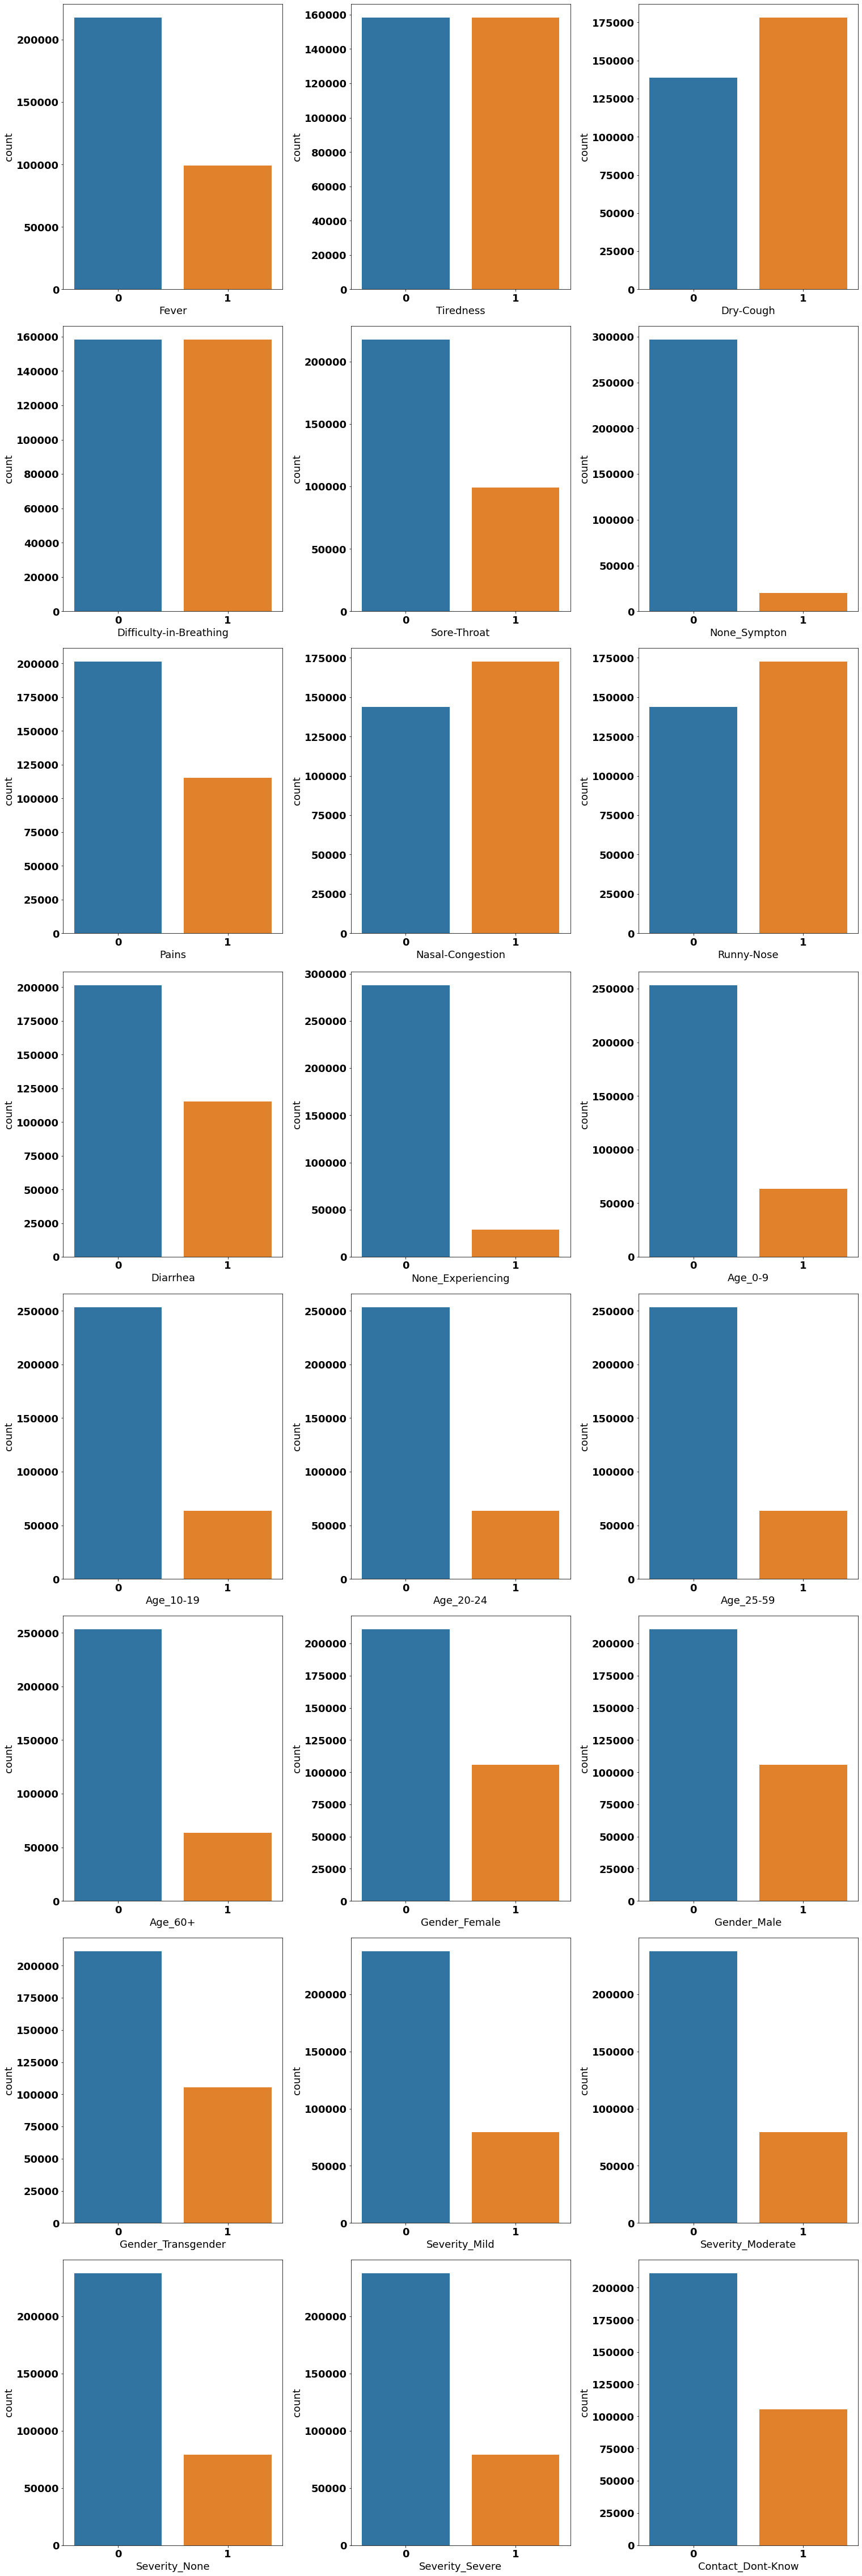

In [ ]:
categorical_vars = ['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes']
num_plots = len(categorical_vars)
total_cols = 3
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows-1, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
for i, var in enumerate(categorical_vars):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=df, ax=axs[row][pos])

IndexError: ignored

<Figure size 1152x432 with 0 Axes>

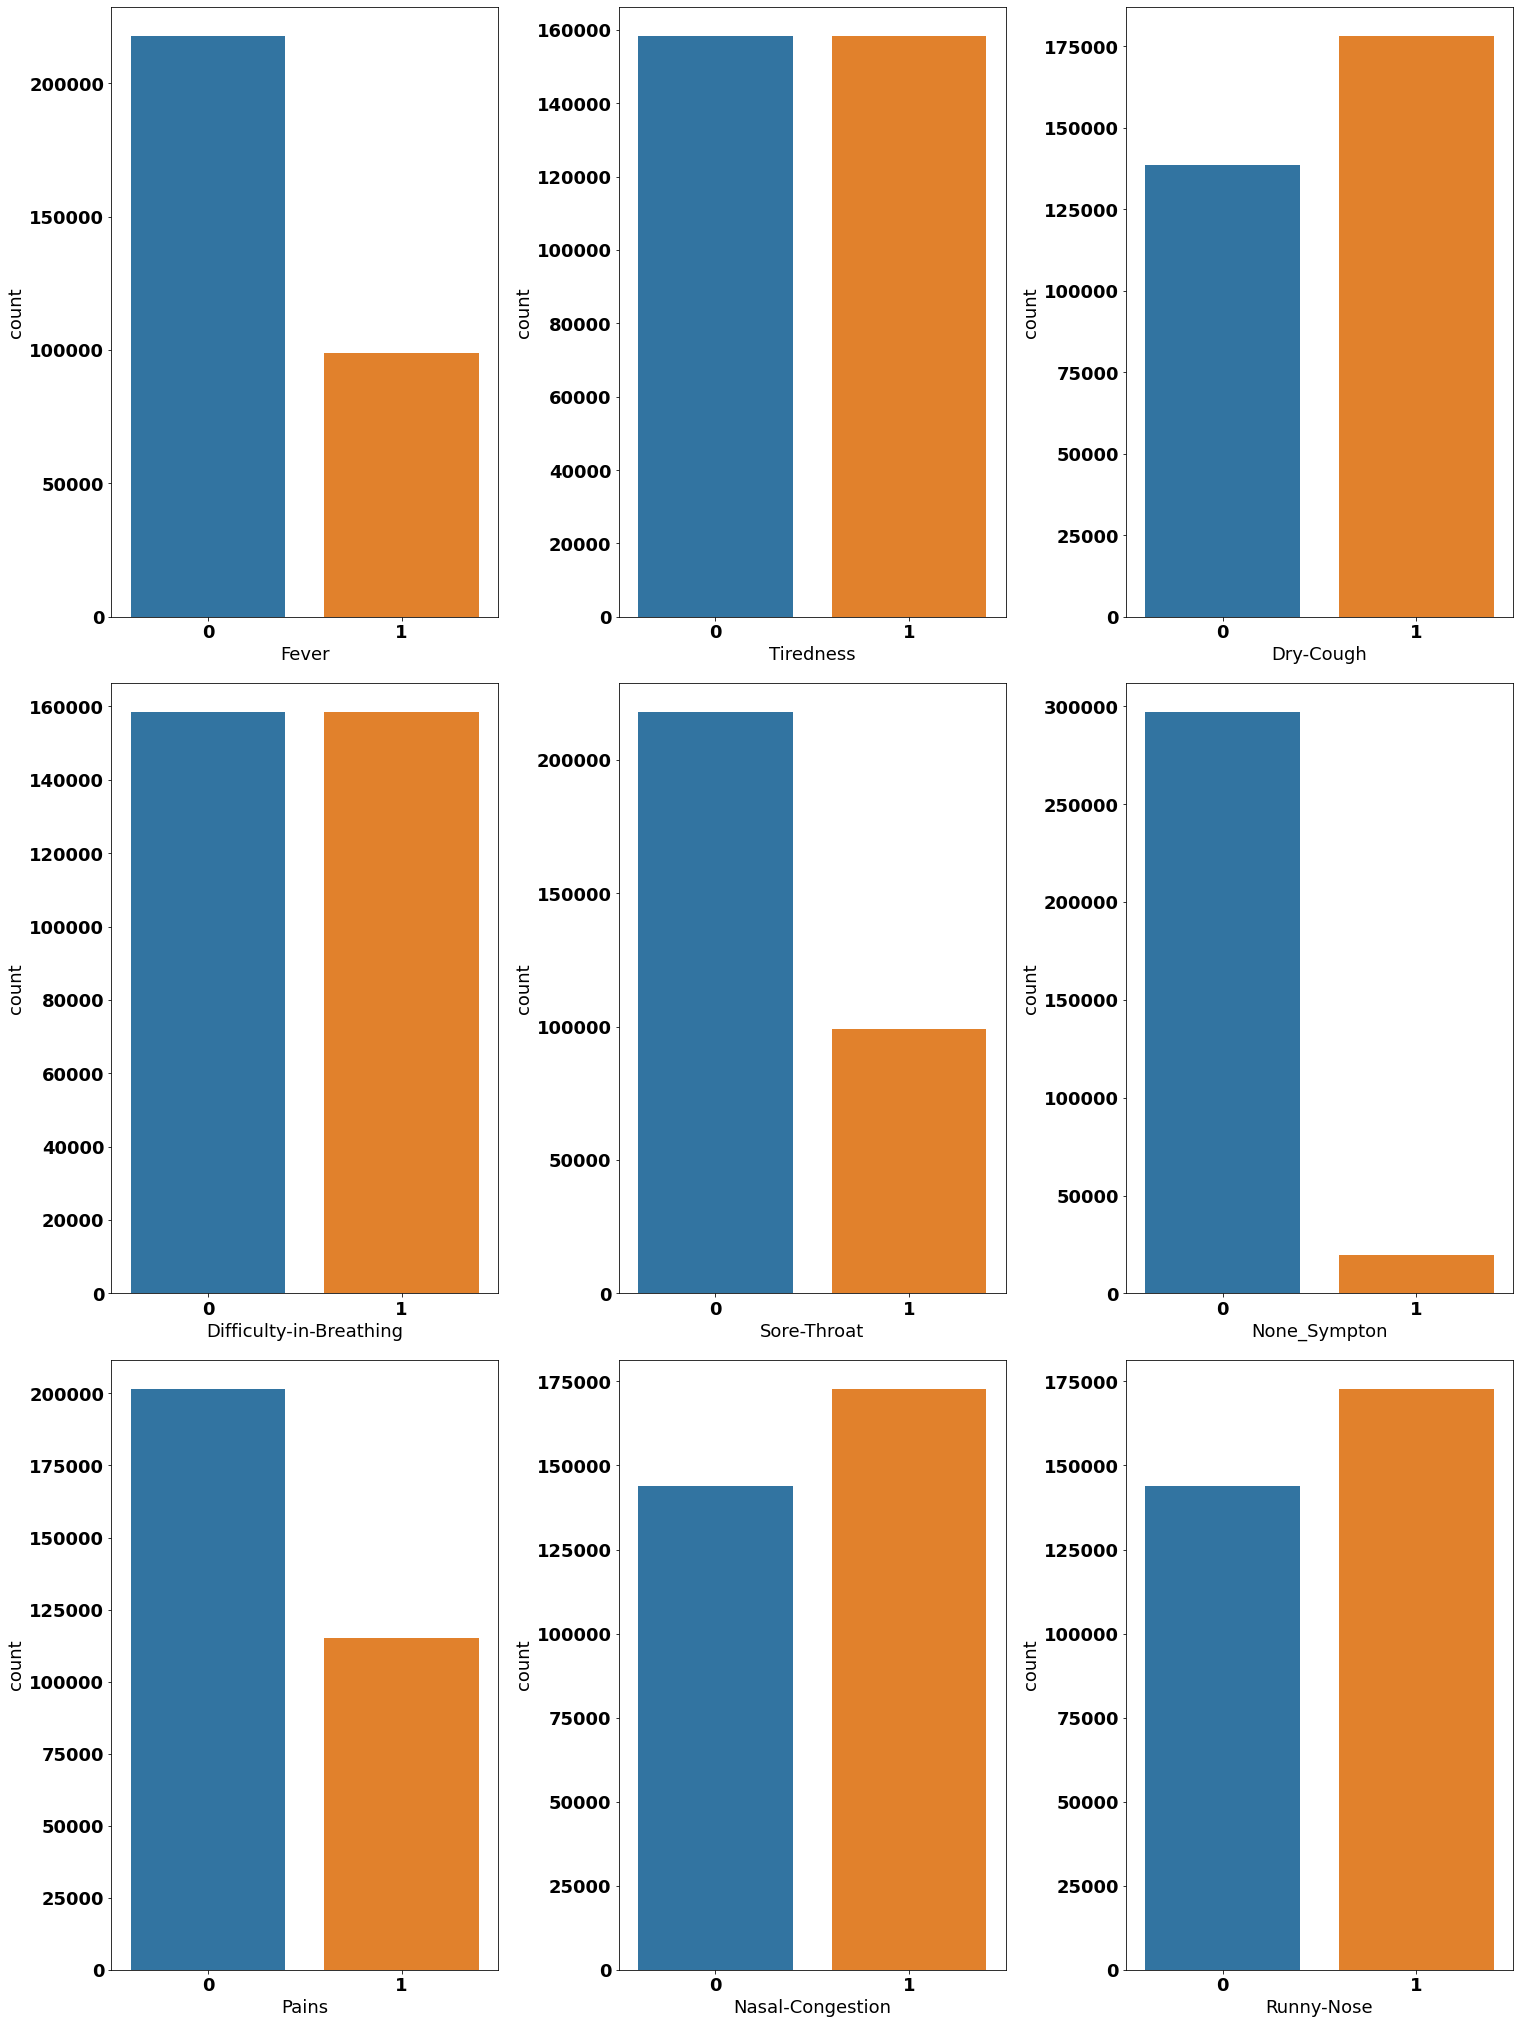

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
figure(num=None, figsize=(16, 6))
categorical_vars = ['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing']
num_plots = len(categorical_vars)
total_cols = 3
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows-1, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
for i, var in enumerate(categorical_vars):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=df, ax=axs[row][pos]) 

In [ ]:
severity_columns = df.filter(like='Severity_').columns
df['Severity_None'].replace({1:'None',0:'No'},inplace =True)
df['Severity_Mild'].replace({1:'Mild',0:'No'},inplace =True)
df['Severity_Moderate'].replace({1:'Moderate',0:'No'},inplace =True)
df['Severity_Severe'].replace({1:'Severe',0:'No'},inplace =True)
df['Condition']=df[severity_columns].values.tolist()

In [ ]:
def removing(list1):
    list1 = set(list1) 
    list1.discard("No")
    a = ''.join(list1)
    return a

In [ ]:
df['Condition'] = df['Condition'].apply(removing)

In [ ]:
age_columns = df.filter(like='Age_').columns
gender_columns = df.filter(like='Gender_').columns
contact_columns = df.filter(like='Contact_').columns
No_risk_age = df.groupby(['Severity_None'])[age_columns].sum() 
No_risk_gender = df.groupby(['Severity_None'])[gender_columns].sum()
No_risk_contact = df.groupby(['Severity_None'])[contact_columns].sum()
Low_risk_age = df.groupby(['Severity_Mild'])[age_columns].sum()
Low_risk_gender = df.groupby(['Severity_Mild'])[gender_columns].sum()
Low_risk_contact = df.groupby(['Severity_Mild'])[contact_columns].sum()
Moderate_risk_age = df.groupby(['Severity_Moderate'])[age_columns].sum()
Moderate_risk_gender = df.groupby(['Severity_Moderate'])[gender_columns].sum()
Moderate_risk_contact = df.groupby(['Severity_Moderate'])[contact_columns].sum()
Severe_risk_age = df.groupby(['Severity_Severe'])[age_columns].sum()
Severe_risk_gender = df.groupby(['Severity_Severe'])[gender_columns].sum()
Severe_risk_contact = df.groupby(['Severity_Severe'])[contact_columns].sum()

In [ ]:
df['Condition'].unique()

array(['Mild', 'Moderate', 'Severe', 'None'], dtype=object)

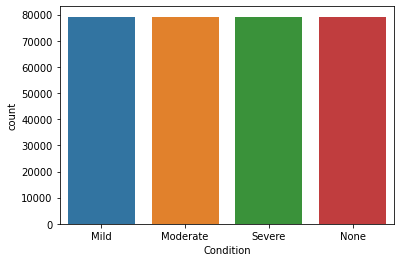

In [ ]:
sns.countplot(df['Condition'])

In [ ]:
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,Other


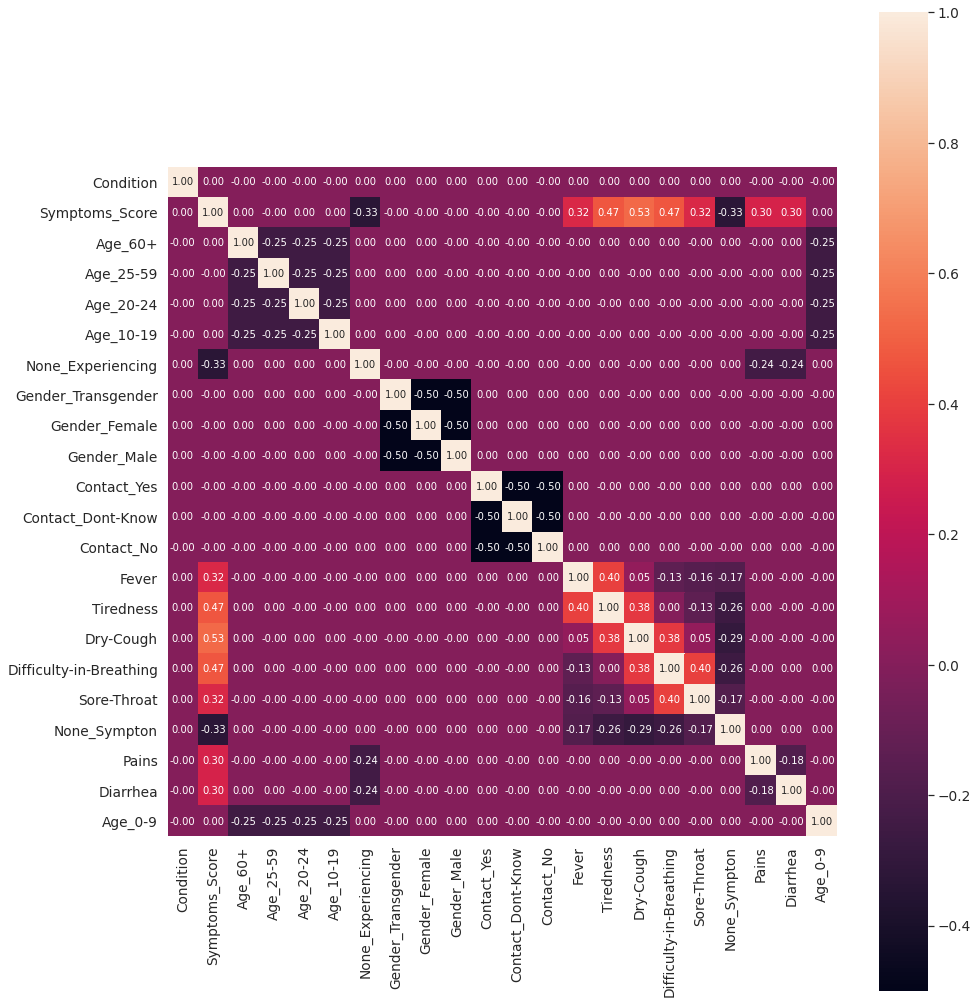

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Condition'] = le.fit_transform(df['Condition'])
from pylab import rcParams
rcParams['figure.figsize'] = 15, 18
corrmat = df.corr()
k = 22
cols = corrmat.nlargest(k, 'Condition')['Condition'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
df['Symptoms_Score'] = df.iloc[:,:5].sum(axis=1) + df.iloc[:,6:10].sum(axis=1)
df.drop(severity_columns,axis=1,inplace=True)


In [ ]:
df.drop("Country",axis=1,inplace=True)


In [ ]:
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Country,Condition,Symptoms_Score
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,China,Mild,9
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,China,Mild,9
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,China,Mild,9
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,China,Moderate,9
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,China,Moderate,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,Other,Severe,0
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,Other,Severe,0
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,Other,None,0
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,Other,None,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
'''
#df['Severity_Mild'] = le.fit_transform(df['Severity_Mild'])
df['Severity_Mild'] = le.fit_transform(df['Severity_Mild'])
df['Severity_Moderate'] = le.fit_transform(df['Severity_Moderate'])
df['Severity_None'] = le.fit_transform(df['Severity_Severe'])
df['Severity_Severe'] = le.fit_transform(df['Severity_Severe'])
'''
df['Condition']=le.fit_transform(df['Condition'])

In [ ]:
df=df.drop(['Country'],axis=1)

In [ ]:
X= df.drop(['Condition'],axis=1)
y= df['Condition']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X_train

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Symptoms_Score
125151,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,4
36050,1,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,7
222457,0,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,5
250914,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,3
296710,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0,0,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,5
259178,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,3
131932,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,4
146867,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,2


In [ ]:
X.shape

(1000, 10)

Feature: 0, Score: 0.04550
Feature: 1, Score: 0.04444
Feature: 2, Score: 0.04629
Feature: 3, Score: 0.04541
Feature: 4, Score: 0.04449
Feature: 5, Score: 0.00773
Feature: 6, Score: 0.04863
Feature: 7, Score: 0.04777
Feature: 8, Score: 0.04617
Feature: 9, Score: 0.04970
Feature: 10, Score: 0.00995
Feature: 11, Score: 0.03365
Feature: 12, Score: 0.03091
Feature: 13, Score: 0.03512
Feature: 14, Score: 0.03473
Feature: 15, Score: 0.03439
Feature: 16, Score: 0.03474
Feature: 17, Score: 0.03439
Feature: 18, Score: 0.03539
Feature: 19, Score: 0.03466
Feature: 20, Score: 0.03747
Feature: 21, Score: 0.03611
Feature: 22, Score: 0.18238


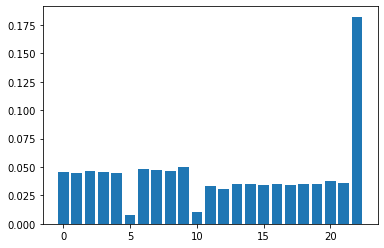

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.01651
Feature: 1, Score: 0.01013
Feature: 2, Score: 0.18331
Feature: 3, Score: 0.30991
Feature: 4, Score: 0.08424
Feature: 5, Score: 0.00267
Feature: 6, Score: 0.16872
Feature: 7, Score: 0.04266
Feature: 8, Score: 0.13783
Feature: 9, Score: 0.04404


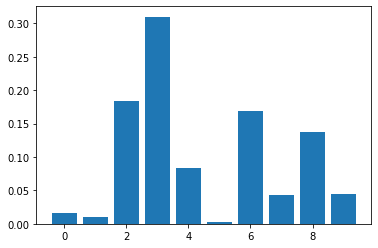

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
# define the model
model = DecisionTreeClassifier()
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [100, 200, 300, 400,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

HYPERPARAMETER TUNE USING GRID SEARCH

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train) 
best_grid = grid_search.best_estimator_ 
print('\n Best Estimator',best_grid)

HYPERPARAMTER TUNING UISNG RANDOMISED SEARCH CV

In [ ]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
random_grid = {'bootstrap': [True, False],
               'max_depth': [4,5,6,7,8,10,None],
               'max_features': ['auto', 'sqrt','log2'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [100, 200, 300,400,500]
               }
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
print(rf_random.best_params_)
print(rf_random.best_score_)
print(rf_random.best_estimator_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X= df.drop(['Condition'],axis=1)
y= df['Condition']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
rfc1=RandomForestClassifier(criterion= 'gini', max_depth= 4, max_features= 'sqrt', n_estimators= 100)
rfc1.fit(X_train, y_train)
pred=rfc1.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

Accuracy for Random Forest on CV data:  1.0
[[15975     0     0     0]
 [    0 15909     0     0]
 [    0     0 15757     0]
 [    0     0     0 15719]]
              precision    recall  f1-score   support

        Mild       1.00      1.00      1.00     15975
    Moderate       1.00      1.00      1.00     15909
        None       1.00      1.00      1.00     15757
      Severe       1.00      1.00      1.00     15719

    accuracy                           1.00     63360
   macro avg       1.00      1.00      1.00     63360
weighted avg       1.00      1.00      1.00     63360



In [ ]:
!pip install catboost

     |████████████████████████████████| 67.3MB 59kB/s 


In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=100)
categorical_var = np.where(X_train.dtypes != np.float)[0]
print('\nCategorical Variables indices : ',categorical_var)
history=model.fit(X_train,y_train,cat_features = categorical_var,plot=True)


Categorical Variables indices :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.5
0:	learn: 0.3411898	total: 207ms	remaining: 20.5s
1:	learn: 0.1834069	total: 344ms	remaining: 16.9s
2:	learn: 0.1048464	total: 514ms	remaining: 16.6s
3:	learn: 0.0615359	total: 667ms	remaining: 16s
4:	learn: 0.0366629	total: 849ms	remaining: 16.1s
5:	learn: 0.0219989	total: 976ms	remaining: 15.3s
6:	learn: 0.0132646	total: 1.14s	remaining: 15.2s
7:	learn: 0.0080239	total: 1.28s	remaining: 14.7s
8:	learn: 0.0048976	total: 1.45s	remaining: 14.7s
9:	learn: 0.0030463	total: 1.62s	remaining: 14.6s
10:	learn: 0.0018672	total: 1.79s	remaining: 14.5s
11:	learn: 0.0011528	total: 1.93s	remaining: 14.2s
12:	learn: 0.0007095	total: 2.08s	remaining: 13.9s
13:	learn: 0.0004814	total: 2.23s	remaining: 13.7s
14:	learn: 0.0003310	total: 2.4s	remaining: 13.6s
15:	learn: 0.0002400	total: 2.57s	remaining: 13.5s
16:	learn: 0.0001703	total: 2.74s	remaining: 13.4s
17:	learn: 0.0001294	total: 2.9s	remaining: 13.2s
18:	learn: 0.0001023	total: 3.07s	remaining: 13.1s
19:	learn: 0.0000837

In [ ]:
print(history.best_iteration_)

None


In [ ]:
print(history.calc_feature_statistics)

<bound method CatBoost.calc_feature_statistics of <catboost.core.CatBoostClassifier object at 0x7f573a2a9d50>>


In [ ]:
df
df['Severity_Mild'] = le.fit_transform(df['Severity_Mild'])
df['Severity_Moderate'] = le.fit_transform(df['Severity_Moderate'])
df['Severity_None'] = le.fit_transform(df['Severity_Severe'])
df['Severity_Severe'] = le.fit_transform(df['Severity_Severe'])

In [ ]:
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Condition
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,Mild
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,Mild
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,Mild
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,Moderate
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,0,1,0,SevereNone
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,SevereNone
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,


In [ ]:
df['Condition'] = le.fit_transform(df['Condition'])

In [ ]:
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Condition
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,2
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,0,1,0,3
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,3
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0


## GENETIC ALGO

In [ ]:
X= df.drop(['Condition'],axis=1)
y= df['Condition']
X

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,0,1,0
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0


In [ ]:
X

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,0,1,0
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0


In [ ]:
X

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,Mild,No,No,No,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,Mild,No,No,No,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,Mild,No,No,No,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,No,Moderate,No,No,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,No,Moderate,No,No,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,No,No,No,Severe,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,No,No,No,Severe,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,No,No,None,No,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,No,No,None,No,0,1,0,Other


In [ ]:
y

0         1
1         1
2         1
3         2
4         2
         ..
316795    3
316796    3
316797    0
316798    0
316799    0
Name: Condition, Length: 316800, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

# Form training, test, and validation sets
X_trainAndTest, X_validation, y_trainAndTest, y_validation = train_test_split(X, y ,test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_trainAndTest, y_trainAndTest, test_size=0.20, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
!pip install deap
!pip install scoop

     |████████████████████████████████| 163kB 16.6MB/s 
     |████████████████████████████████| 604kB 13.4MB/s 
  Created wheel for scoop: filename=scoop-0.7.1.1-cp37-none-any.whl size=72125 sha256=3ea145ccf73c626505e8e70f2ca4882eb29e9d111ea7a5732431fa9d4c1d9d0e
  Stored in directory: /root/.cache/pip/wheels/9e/54/e5/5105f5602fdc4a1fbc911d786ca1114ee8f870ac00752d302f
Successfully built scoop


In [ ]:
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from deap import creator, base, tools, algorithms
from scoop import futures
import random
import numpy
from scipy import interpolate
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
allFeatures=X
allClasses=y
# Feature subset fitness function
def getFitness(individual, X_train, X_test, y_train, y_test):

 # Apply log regression on the data, and calculate accuracy
	clf = LogisticRegression()
	clf.fit(X_train, y_train)
	predictions = clf.predict(X_test)
	accuracy = clf.score(y_test, predictions)

	# Return calculated accuracy as fitness
	return (accuracy,)
 

# Create Individual
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Create Toolbox
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, len(df.columns) - 1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Continue filling toolbox...
toolbox.register("evaluate", getFitness, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
def getHof():

	# Initialize variables to use eaSimple
	numPop = 50
	numGen = 10
	pop = toolbox.population(n=numPop)
	hof = tools.HallOfFame(numPop * numGen)
	stats = tools.Statistics(lambda ind: ind.fitness.values)
	stats.register("avg", numpy.mean)
	stats.register("std", numpy.std)
	stats.register("min", numpy.min)
	stats.register("max", numpy.max)

	# Launch genetic algorithm
	pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=numGen, stats=stats, halloffame=hof, verbose=True)

	# Return the hall of fame
	return hof
def getMetrics(hof):

	# Get list of percentiles in the hall of fame
	percentileList = [i / (len(hof) - 1) for i in range(len(hof))]
	
	# Gather fitness data from each percentile
	testAccuracyList = []
	validationAccuracyList = []
	individualList = []
	for individual in hof:
		testAccuracy = individual.fitness.values
		validationAccuracy = getFitness(individual, X_trainAndTest, X_validation, y_trainAndTest, y_validation)
		testAccuracyList.append(testAccuracy[0])
		validationAccuracyList.append(validationAccuracy[0])
		individualList.append(individual)
	testAccuracyList.reverse()
	validationAccuracyList.reverse()
	return testAccuracyList, validationAccuracyList, individualList, percentileList

In [ ]:
y

In [ ]:
X

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,0,1,0
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0


In [ ]:
y=y.to_numpy()

In [ ]:
y

array([[1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
    

In [ ]:
y=y.reshape(-1, 1)

In [ ]:
y

array([[1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
    

In [ ]:
X


array([[ 2.56999479, -0.13019997,  3.16075093, ..., -1.93094078,
         3.26130366,  2.05692145],
       [ 0.34129317,  2.51321418, -0.80416572, ...,  6.24734437,
        -1.92769365,  2.9503149 ],
       [ 2.27539972,  3.36561455,  0.17164362, ...,  2.74693781,
         0.13492444,  2.00339547],
       ...,
       [ 0.5234359 ,  1.90466429,  0.93243365, ...,  1.53945231,
         1.90646166,  1.99458587],
       [ 1.33747921,  3.25859684,  0.78792366, ...,  5.18788314,
        -0.82071083,  3.51411431],
       [-0.98534299,  0.83919047,  2.5820803 , ...,  3.04705685,
         0.66885641,  3.32838496]])

In [ ]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0 0 1 9]
 [0 1 0 9]
 [1 0 0 9]
 [0 0 1 9]
 [0 1 0 9]]


In [ ]:
hof = getHof()
testAccuracyList, validationAccuracyList, individualList, percentileList = getMetrics(hof)

	# Get a list of subsets that performed best on validation data
maxValAccSubsetIndicies = [index for index in range(len(validationAccuracyList)) if validationAccuracyList[index] == max(validationAccuracyList)]
maxValIndividuals = [individualList[index] for index in maxValAccSubsetIndicies]
maxValSubsets = [[list(allFeatures)[index] for index in range(len(individual)) if individual[index] == 1] for individual in maxValIndividuals]

#RETURN BEST OPTIMAL FEATURES
print('\n---Optimal Feature Subset(s)---\n')
for index in range(len(maxValAccSubsetIndicies)):
	print('Percentile: \t\t\t' + str(percentileList[maxValAccSubsetIndicies[index]]))
	print('Validation Accuracy: \t\t' + str(validationAccuracyList[maxValAccSubsetIndicies[index]]))
	print('Individual: \t' + str(maxValIndividuals[index]))
	print('Number Features In Subset: \t' + str(len(maxValSubsets[index])))
	print('Feature Subset: ' + str(maxValSubsets[index]))

gen	nevals	avg     	std        	min     	max     
0  	50    	0.998138	1.11022e-16	0.998138	0.998138
1  	32    	0.998138	1.11022e-16	0.998138	0.998138
2  	28    	0.998138	1.11022e-16	0.998138	0.998138
3  	31    	0.998138	1.11022e-16	0.998138	0.998138
4  	34    	0.998138	1.11022e-16	0.998138	0.998138
5  	34    	0.998138	1.11022e-16	0.998138	0.998138
6  	27    	0.998138	1.11022e-16	0.998138	0.998138
7  	35    	0.998138	1.11022e-16	0.998138	0.998138
8  	31    	0.998138	1.11022e-16	0.998138	0.998138
9  	30    	0.998138	1.11022e-16	0.998138	0.998138
10 	32    	0.998138	1.11022e-16	0.998138	0.998138

---Optimal Feature Subset(s)---

Percentile: 			0.0
Validation Accuracy: 		0.9998180387598096
Individual: 	[1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1]
Number Features In Subset: 	13
Feature Subset: ['Fever', 'Dry-Cough', 'Sore-Throat', 'None_Sympton', 'Pains', 'None_Experiencing', 'Age_0-9', 'Age_10-19', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Contact_Dont-Know', 'Symp

##BAYESIAN MODELLING

In [ ]:
!pip install pgmpy

     |████████████████████████████████| 337kB 5.8MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import networkx as nn

In [ ]:
data=pd.read_csv("/content/gdrive/MyDrive/Kaggle/Cleaned-Data-updated.csv")

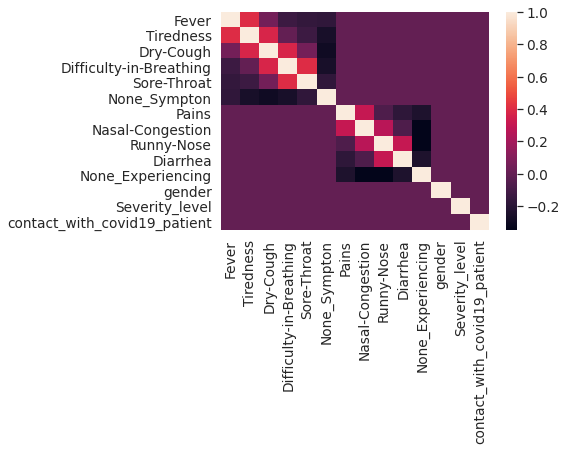

In [ ]:
sns.heatmap(data.corr())

In [ ]:
model = BayesianModel([('gender','Fever'),('gender','Tiredness'),('gender','Dry-Cough'),('gender','Difficulty-in-Breathing'),('gender','Sore-Throat'),('gender','None_Sympton'),('gender','Pains'),('gender','Nasal-Congestion'),('gender','Runny-Nose'),('gender','Diarrhea'),
                      ('age','Fever'),('age','Tiredness'),('age','Dry-Cough'),('age','Difficulty-in-Breathing'),('age','Sore-Throat'),('age','None_Sympton'),('age','Pains'),('age','Nasal-Congestion'),('age','Runny-Nose'),('age','Diarrhea'),
                       ('contact_with_covid19_patient','Fever'),('contact_with_covid19_patient','Tiredness'),('contact_with_covid19_patient','Dry-Cough'),('contact_with_covid19_patient','Difficulty-in-Breathing'),('contact_with_covid19_patient','Sore-Throat'),('contact_with_covid19_patient','None_Sympton'),('contact_with_covid19_patient','Pains'),('contact_with_covid19_patient','Nasal-Congestion'),('contact_with_covid19_patient','Runny-Nose'),('contact_with_covid19_patient','Diarrhea'),
                      ('Country','age'),('Country','gender'),('Country','contact_with_covid19_patient'),
                       ('Fever','Severity_level'),('Tiredness','Severity_level'),('Runny-Nose','Severity_level'),('Nasal-Congestion','Severity_level'),('Diarrhea','Severity_level'),('Difficulty-in-Breathing','Severity_level'),('Sore-Throat','Severity_level'),('None_Sympton','Severity_level'),('Pains','Severity_level'),('Dry-Cough','Severity_level')]) 
#])

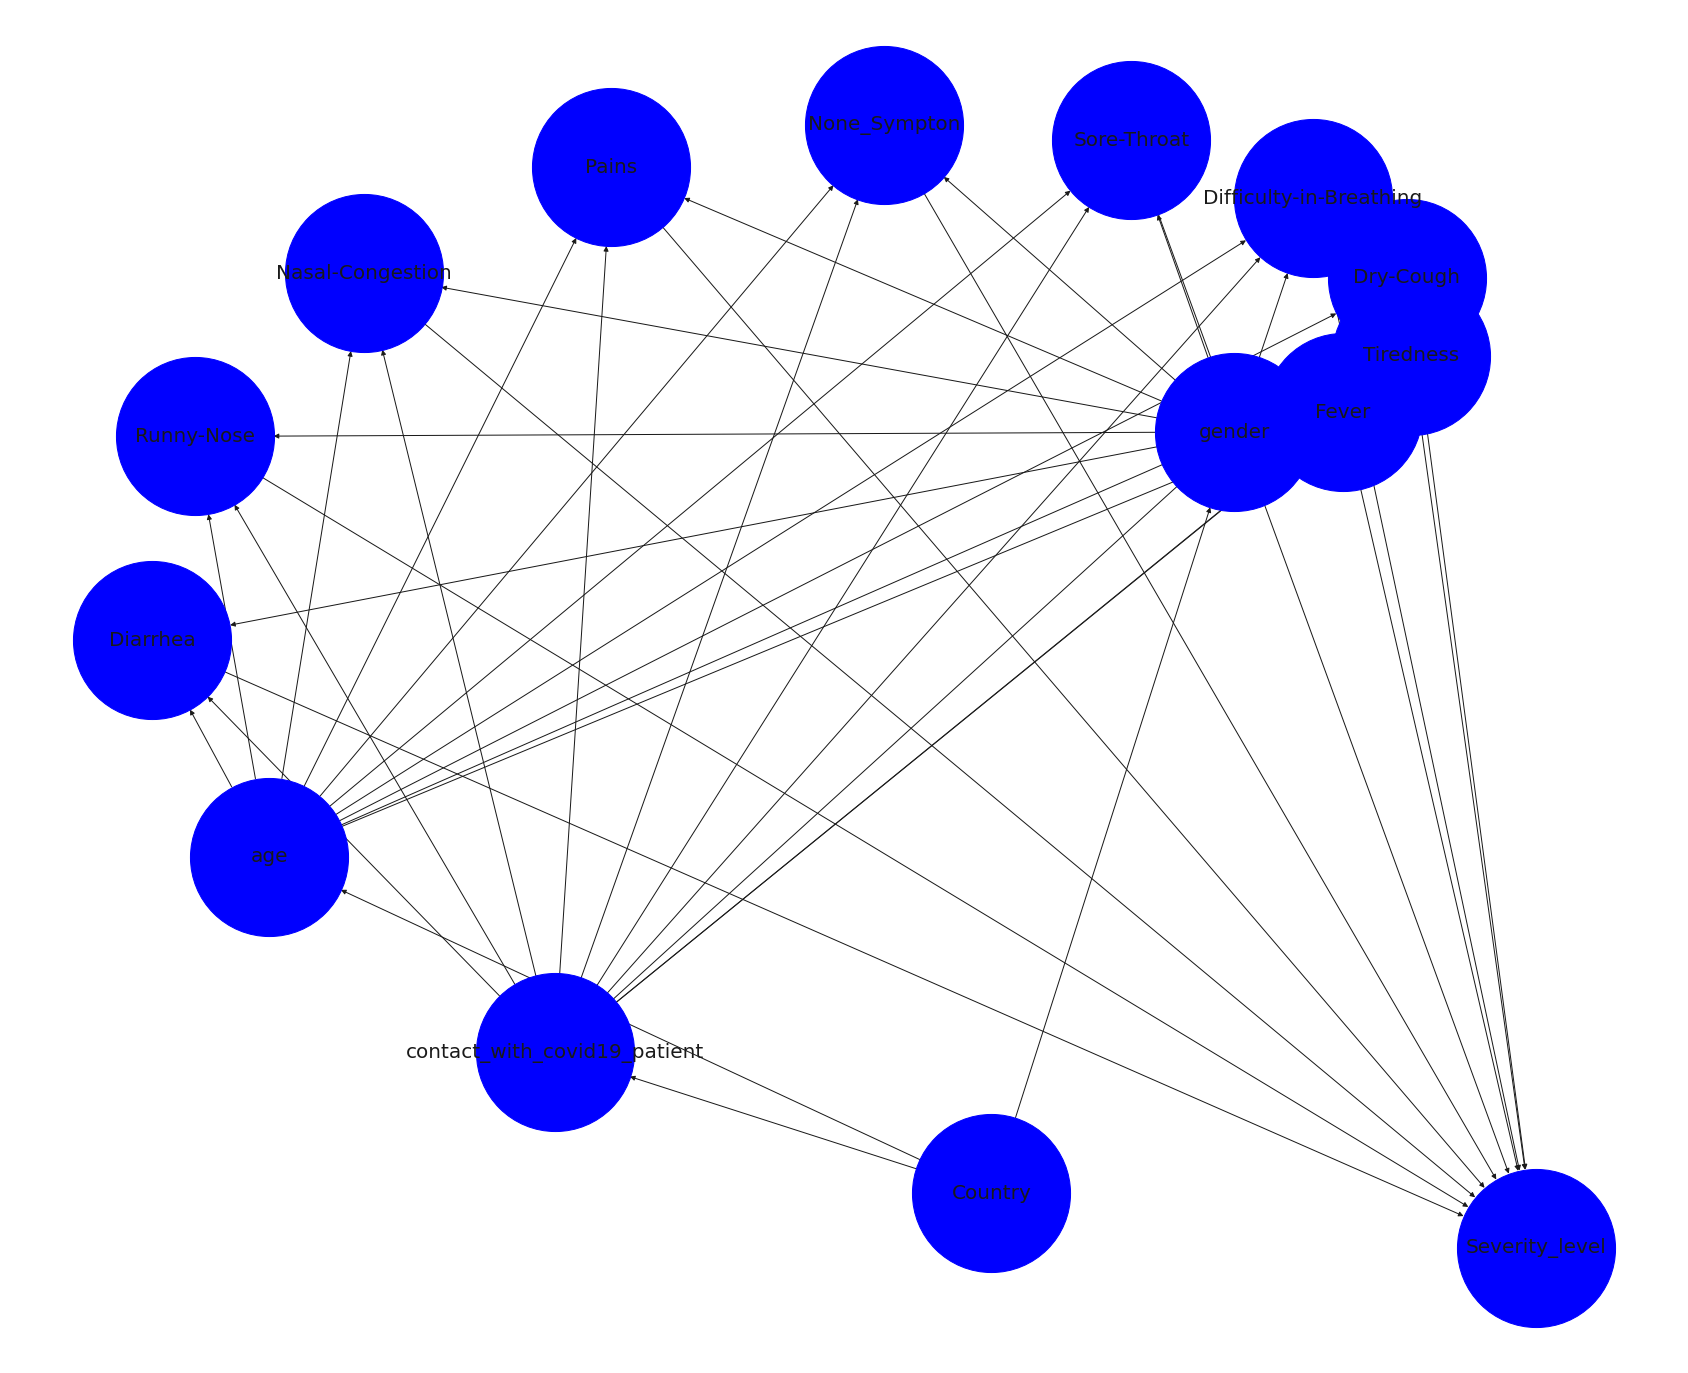

In [ ]:
model.fit(data,estimator=MaximumLikelihoodEstimator)
fig,ax = plt.subplots(figsize=(30,25))
#position = nn.kamada_kawai_layout(model)
position = nn.spiral_layout(model)
nn.draw(model,pos=position,ax=ax,with_labels=True,node_color='blue',node_size=25000,font_size=20)
plt.show()

In [ ]:
print(model.get_cpds())


[<TabularCPD representing P(Country:10) at 0x7f56cedbb6d0>, <TabularCPD representing P(Diarrhea:2 | age:18, contact_with_covid19_patient:3, gender:3) at 0x7f56cedadf90>, <TabularCPD representing P(Difficulty-in-Breathing:2 | age:18, contact_with_covid19_patient:3, gender:3) at 0x7f56cede4310>, <TabularCPD representing P(Dry-Cough:2 | age:18, contact_with_covid19_patient:3, gender:3) at 0x7f56ced63310>, <TabularCPD representing P(Fever:2 | age:18, contact_with_covid19_patient:3, gender:3) at 0x7f56d01f0e50>, <TabularCPD representing P(Nasal-Congestion:2 | age:18, contact_with_covid19_patient:3, gender:3) at 0x7f56cf2f9410>, <TabularCPD representing P(None_Sympton:2 | age:18, contact_with_covid19_patient:3, gender:3) at 0x7f56cef1a8d0>, <TabularCPD representing P(Pains:2 | age:18, contact_with_covid19_patient:3, gender:3) at 0x7f56cedecf90>, <TabularCPD representing P(Runny-Nose:2 | age:18, contact_with_covid19_patient:3, gender:3) at 0x7f56cf159150>, <TabularCPD representing P(Severity_

In [ ]:
print(model.get_cpds('age'))

+---------------------------------------------------------------------------------------------+-----------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+-----------------------------+---------------------+---------------------+
| Country                                                                                     | Country(China)        | Country(France)     | Country(Germany)    | Country(Iran)       | Country(Italy)      | Country(Other)      | Country(Other-EUR)  | Country(Republic of Korean) | Country(Spain)      | Country(UAE)        |
+---------------------------------------------------------------------------------------------+-----------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+-----------------------------+---------------------+---------------------+
| age(      8      eli

In [ ]:
print(model.get_cpds('gender'))

+-------------+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------------------+--------------------+--------------------+
| Country     | Country(China)      | Country(France)    | Country(Germany)   | Country(Iran)      | Country(Italy)     | Country(Other)     | Country(Other-EUR) | Country(Republic of Korean) | Country(Spain)     | Country(UAE)       |
+-------------+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------------------+--------------------+--------------------+
| gender(1.0) | 0.3338239932709494  | 0.3333333333333333 | 0.3333333333333333 | 0.3333333333333333 | 0.3333333333333333 | 0.3333333333333333 | 0.3333333333333333 | 0.3333333333333333          | 0.3333333333333333 | 0.3333333333333333 |
+-------------+---------------------+-------------------

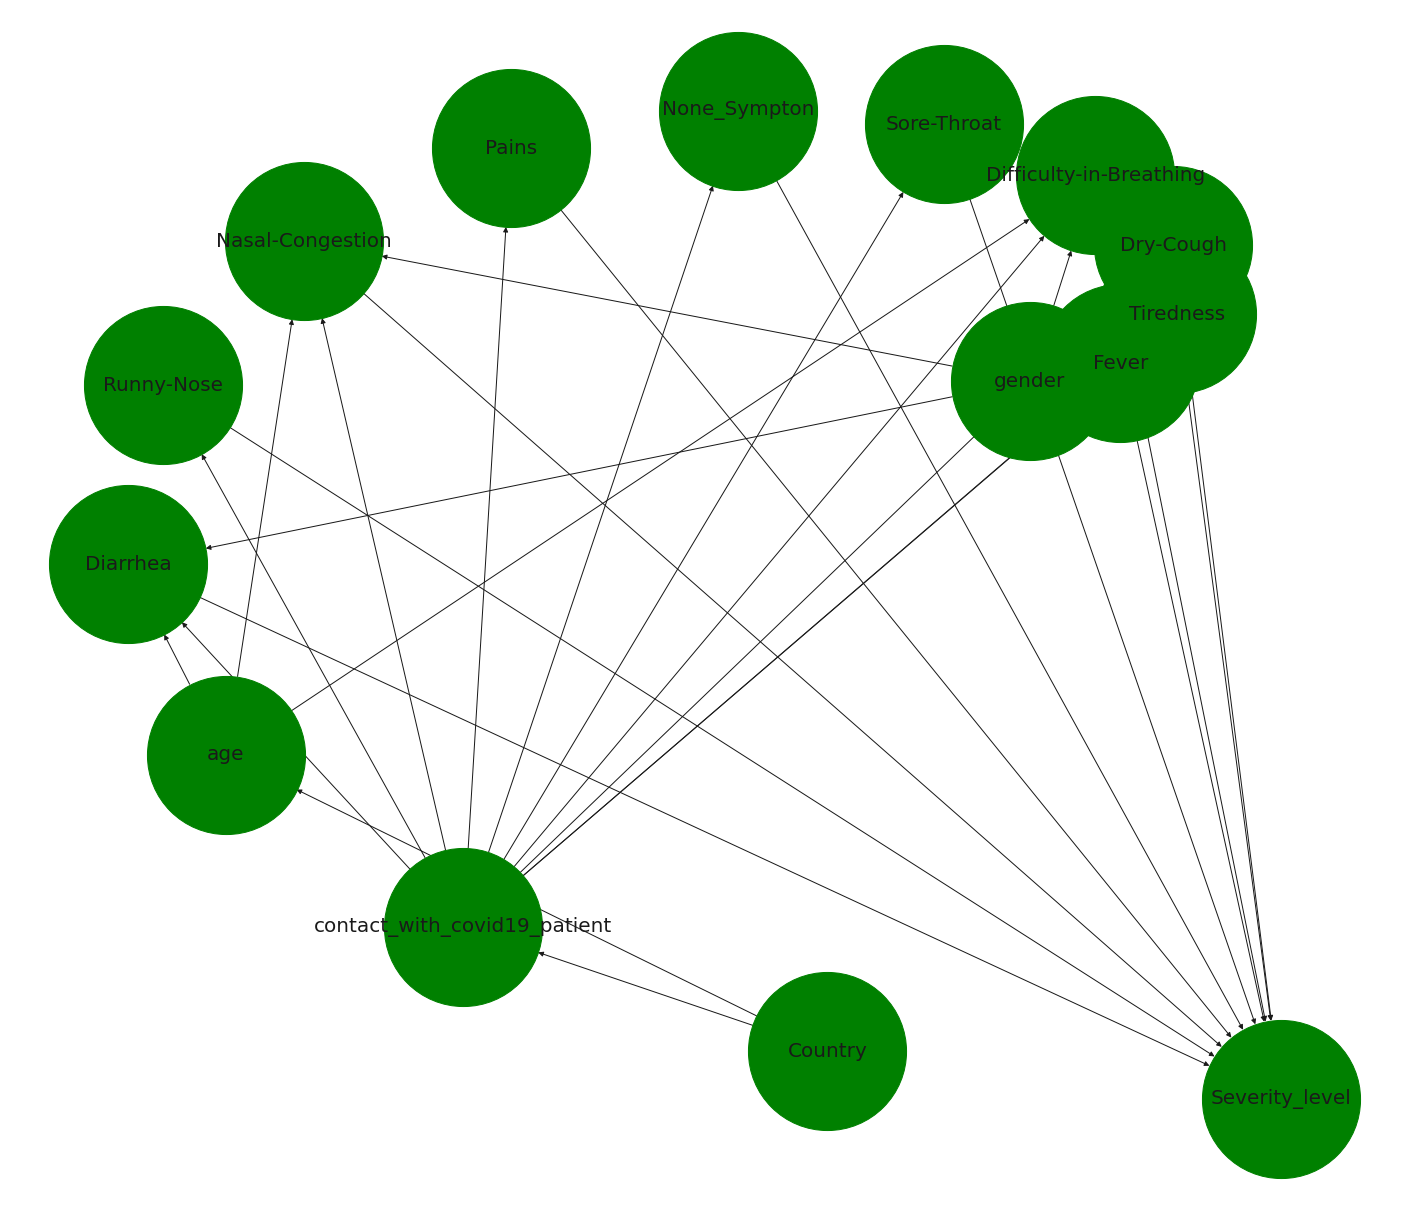

In [ ]:
model1 = BayesianModel([('gender','Difficulty-in-Breathing'),('gender','Nasal-Congestion'),('gender','Diarrhea'),
                      ('age','Difficulty-in-Breathing'),('age','Nasal-Congestion'),('age','Diarrhea'),
                       ('contact_with_covid19_patient','Fever'),('contact_with_covid19_patient','Tiredness'),('contact_with_covid19_patient','Dry-Cough'),('contact_with_covid19_patient','Difficulty-in-Breathing'),('contact_with_covid19_patient','Sore-Throat'),('contact_with_covid19_patient','None_Sympton'),('contact_with_covid19_patient','Pains'),('contact_with_covid19_patient','Nasal-Congestion'),('contact_with_covid19_patient','Runny-Nose'),('contact_with_covid19_patient','Diarrhea'),
                      ('Country','age'),('Country','contact_with_covid19_patient'),
                       ('Fever','Severity_level'),('Tiredness','Severity_level'),('Runny-Nose','Severity_level'),('Nasal-Congestion','Severity_level'),('Diarrhea','Severity_level'),('Difficulty-in-Breathing','Severity_level'),('Sore-Throat','Severity_level'),('None_Sympton','Severity_level'),('Pains','Severity_level'),('Dry-Cough','Severity_level')]) 
#])
model1.fit(data,estimator=MaximumLikelihoodEstimator)
fig,ax = plt.subplots(figsize=(25,22))
#position = nn.kamada_kawai_layout(model)
position = nn.spiral_layout(model)
nn.draw(model1,pos=position,ax=ax,with_labels=True,node_color='green',node_size=25000,font_size=20)
plt.show()